## Decision Tree Classifier
In this  Project we are going to predict Does the person is suffering from Heart Disease or Not 
Its a classification Problem 
We have got our data from open source which contain 305x11 element


In [1]:
#Importing Libaray for Processing the data
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [37]:
#Importing libaray for buliding model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
data=pd.read_csv('Heart.csv')

In [4]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
data =data.drop(["Unnamed: 0"],axis=1)

In [6]:
data = data.fillna(data["Ca"].mean())

In [7]:
data["Thal"].mode()[0]

'normal'

In [8]:
data1 = data['Thal'].fillna("normal")

In [9]:
data = data.dropna(axis = 0)

In [10]:
data.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    float64
 12  Thal       303 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [12]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['AHD']= label_encoder.fit_transform(data['AHD']) 
  
data['AHD'].unique() 

array([0, 1])

In [13]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [14]:
#Changing the categorical data into numerical data
data = pd.get_dummies(data)

In [15]:
data.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_0.6722408026755853,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,0,1,0,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,1,0,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,1,0,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,0,1,0,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,0,1,0,0,0,1,0


In [16]:
X=data.drop('AHD', axis=1).copy()

In [17]:
X

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_0.6722408026755853,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.000000,0,0,0,1,0,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.000000,1,0,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.000000,1,0,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.000000,0,1,0,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.000000,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,0,132,0,1.2,2,0.000000,0,0,0,1,0,0,0,1
299,68,1,144,193,1,0,141,0,3.4,2,2.000000,1,0,0,0,0,0,0,1
300,57,1,130,131,0,0,115,1,1.2,2,1.000000,1,0,0,0,0,0,0,1
301,57,0,130,236,0,2,174,0,0.0,2,1.000000,0,0,1,0,0,0,1,0


In [18]:
y=data['AHD'].copy()

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42 )

In [20]:
dt=DecisionTreeClassifier(criterion= "gini", max_depth=3)
dt_fit=dt.fit(X_train,y_train)

In [21]:
dt=dt.fit(X_train,y_train)

In [22]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
y_pred = dt.predict(X_test)

Text(0.5, 0, 'Y test')

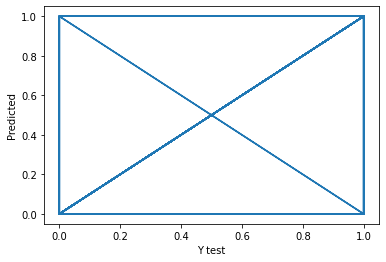

In [24]:
#plotting the predicted the value
plt.plot(y_test, y_pred)
plt.ylabel('Predicted')
plt.xlabel('Y test')

In [38]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MAE: 0.21052631578947367
MSE: 0.21052631578947367
RMSE: 0.45883146774112354


In [26]:
y_test

179    0
228    1
111    1
246    1
60     1
      ..
22     1
258    0
56     1
242    0
114    1
Name: AHD, Length: 76, dtype: int32

In [27]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [28]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy of the model is : ', accuracy)

Accuracy of the model is :  0.7894736842105263


In [29]:
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[30,  9],
       [ 7, 30]], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
import seaborn as sns

<AxesSubplot:>

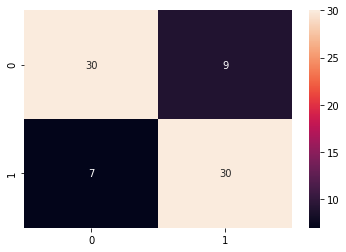

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        39
           1       0.77      0.81      0.79        37

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



In [35]:
from sklearn import tree

[Text(167.4, 190.26, 'X[11] <= 0.5\ngini = 0.495\nsamples = 227\nvalue = [125, 102]'),
 Text(83.7, 135.9, 'X[0] <= 56.5\ngini = 0.343\nsamples = 123\nvalue = [96, 27]'),
 Text(41.85, 81.53999999999999, 'X[8] <= 3.55\ngini = 0.169\nsamples = 75\nvalue = [68, 7]'),
 Text(20.925, 27.180000000000007, 'gini = 0.128\nsamples = 73\nvalue = [68, 5]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.486\nsamples = 48\nvalue = [28, 20]'),
 Text(104.625, 27.180000000000007, 'gini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(146.475, 27.180000000000007, 'gini = 0.471\nsamples = 29\nvalue = [11, 18]'),
 Text(251.10000000000002, 135.9, 'X[10] <= 0.5\ngini = 0.402\nsamples = 104\nvalue = [29, 75]'),
 Text(209.25, 81.53999999999999, 'X[18] <= 0.5\ngini = 0.498\nsamples = 47\nvalue = [25, 22]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.366\nsamples = 29\nvalue = [22, 7]'),
 Te

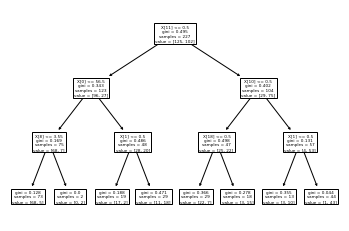

In [36]:
tree.plot_tree(dt)